In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# create engine to hawaii.sqlite
# Path to sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

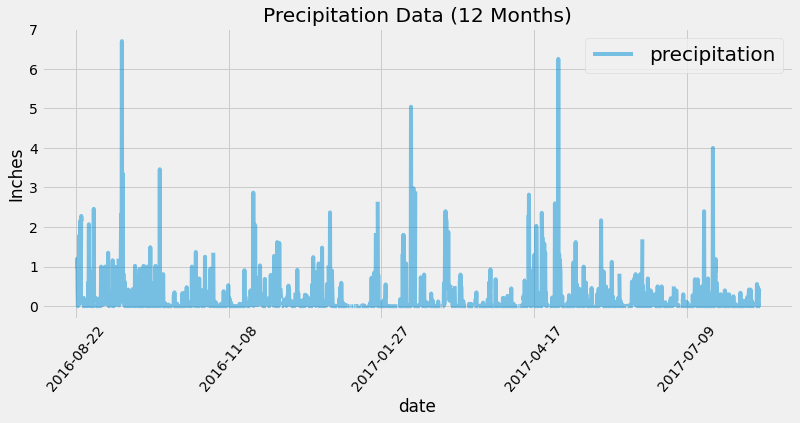

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=366)

# Calculate the date one year from the last date in data set.# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_df = pd.DataFrame(scores, columns=['date','precipitation'])
date_df.set_index(date_df['date'], inplace=True)

# Sort the dataframe by date
date_df = date_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
p_df.plot(title="Precipitation Data (12 Months)", alpha=.50, figsize=(12,5), rot=50)
plt.legend(loc='upper right', prop={'size': 20})
plt.ylabel("Inches")
plt.show()



In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number stations in the dataset
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

total_stations = session.query(Station.station).distinct().count()
total_stations

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


9

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=active_stations[0][0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: USC00519281


Station USC00519281 has min, max, and avg temperatures of [(54.0, 85.0, 71.66378066378067)].


<AxesSubplot:title={'center':'Temperature vs. Frequency Histogram'}, ylabel='Frequency'>

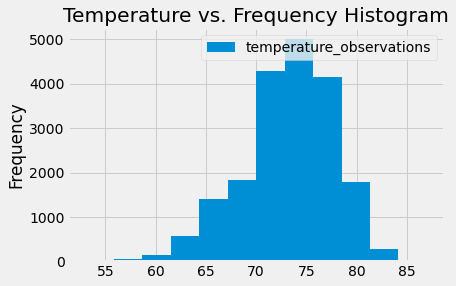

In [61]:
# Using the most active station id. tob= temperature observations
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f"Station USC00519281 has min, max, and avg temperatures of {station_stats}.")
# Plot the results as a histogram with bins=12.
temp_df = pd.DataFrame (temp_obs, columns=['temperature_observations'])
temp_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")


# Close session

In [62]:
# Close Session
session.close()